In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

In [2]:
mybl_lang = pd.read_csv('mybl_lang.csv')
mybl_lang = mybl_lang.loc[mybl_lang['name'] != 'Swift']
mybl_lang.drop('id', axis=1, inplace=True)

In [3]:
langs = mybl_lang.pivot(index='date_added', columns='name', values=['val', 'val_noexp', 'res_vac'])
langs.dropna(inplace=True)

In [4]:
Mind = pd.MultiIndex.from_tuples([('res', i) for i in langs['val'].columns])
langs_res = langs['res_vac'] * langs['val']
langs_res.columns = Mind
langs = pd.merge(langs, langs_res, how='left', on='date_added')

In [5]:
#normalization
for i in langs.columns:
    langs[i] = langs[i]/(max(langs[i]))

langs.describe()

val                                                        \
                1c         ABAP      Android Data scientist       DevOps   
count  1393.000000  1393.000000  1393.000000    1393.000000  1393.000000   
mean      0.774520     0.371945     0.498103       0.695179     0.637708   
std       0.109963     0.259955     0.233233       0.145767     0.116575   
min       0.556527     0.105000     0.194562       0.413926     0.398362   
25%       0.672016     0.175000     0.328097       0.568665     0.545793   
50%       0.761355     0.235000     0.387311       0.717602     0.615041   
75%       0.868104     0.650000     0.741994       0.818182     0.707372   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

                                                                        ...  \
          Frontend       Golang         Java   Javascript       Python  ...   
count  1393.000000  1393.000000  1393.000000  1393.000000  1393.000000  ...   
mean      0.523645     0.741294     0.546160     0.524464     0.629861  ...   
std       0.218447     0.133587     0.190467     0.215548     0.136814  ...   
min       0.257430     0.473684     0.269273     0.245336     0.407917  ...   
25%       0.368125     0.629881     0.410279     0.368470     0.542169  ...   
50%       0.400421     0.726655     0.468263     0.406250     0.578313  ...   
75%       0.751229     0.867572     0.729848     0.750466     0.709983  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               res                                                      \
            Golang         Java   Javascript       Python         Ruby   
count  1393.000000  1393.000000  1393.000000  1393.000000  1393.000000   
mean      0.407336     0.659906     0.718844     0.592749     0.757263   
std       0.245583     0.160568     0.138379     0.219864     0.110361   
min       0.100432     0.415482     0.481316     0.248424     0.600813   
25%       0.168295     0.497204     0.589023     0.366562     0.650155   
50%       0.378772     0.655330     0.734137     0.612062     0.749807   
75%       0.573020     0.785647     0.826162     0.786753     0.849265   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                        
             Scala          cpp           cs          iOS          php  
count  1393.000000  1393.000000  1393.000000  1393.000000  1393.000000  
mean      0.712938     0.662398     0.716526     0.687209     0.719089  
std       0.134208     0.153250     0.137676     0.178749     0.115057  
min       0.474074     0.445126     0.492472     0.400524     0.565695  
25%       0.619012     0.518081     0.570209     0.504147     0.612310  
50%       0.720000     0.638774     0.734647     0.713662     0.701424  
75%       0.808889     0.787636     0.832364     0.836327     0.807112  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 64 columns]

([<matplotlib.axis.XTick at 0x2abe496ead0>,
 [Text(281.0, 0, '2022-01-01'), Text(646.0, 0, '2023-01-01')])

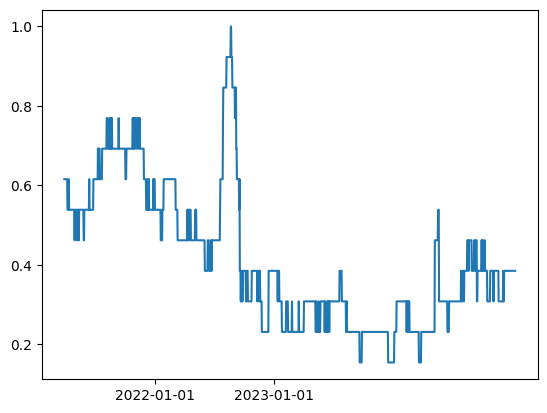

In [6]:
plt.plot(langs["val_noexp", "cpp"])
plt.xticks(['2022-01-01', '2023-01-01'])

In [7]:
def derivative(column, window):
    colmns = langs[column].columns

    langs1 = langs[column].copy()
    langs2 = langs[column].copy()

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels_val = OrderedDict()

    for c in colmns:
        langs1[c] = langs1[c].rolling(window=window).mean()
        langs2[c] = langs2[c].rolling(window=window).mean()
        langs2[c] = langs2[c].shift(window)
        labels_val[c] = (langs1[c] - langs2[c])[-1]

    labels = [k for k, v in sorted(labels_val.items(), key=lambda item: item[1], reverse=True)]

    for i, l in enumerate(labels):   
        if i < 10:
            ax.plot(langs1[l] - langs2[l])
        else:
            ax.plot(langs1[l] - langs2[l], linestyle='--')

    ax.legend(labels, loc='upper left')
    ax.axhline(y=0, color='k')
    plt.xticks('')
    #colmns = langs1.iloc[0].sort_values(ascending=False).index

C:\Users\ksn\AppData\Local\Temp\ipykernel_7212\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


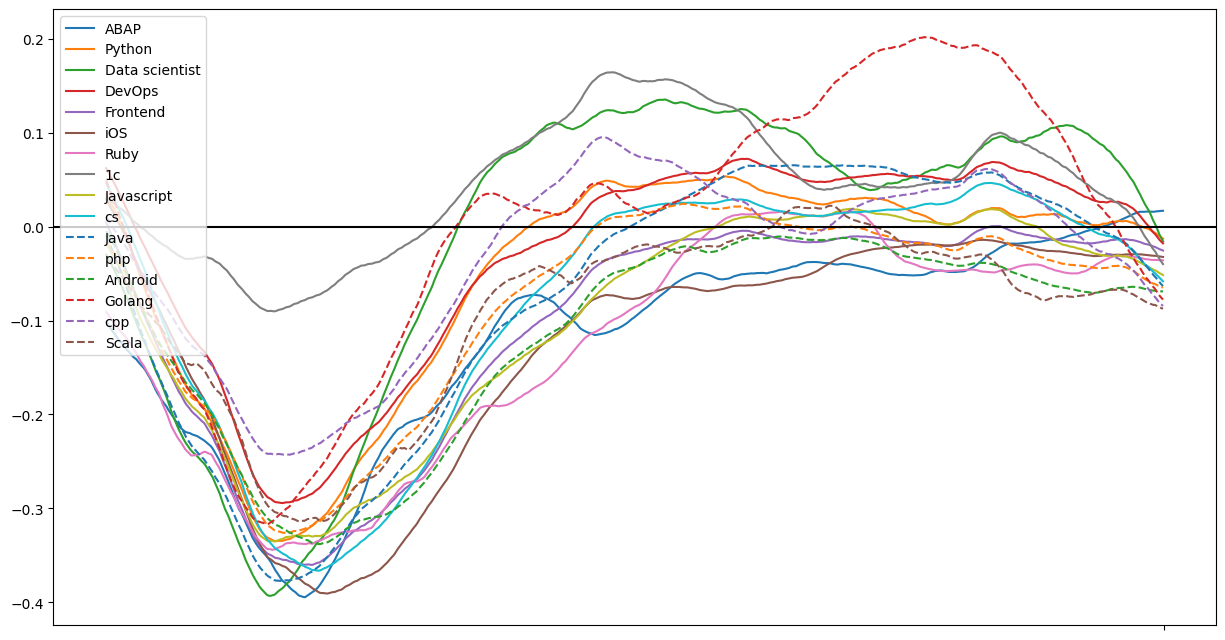

In [8]:
derivative('val', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_7212\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


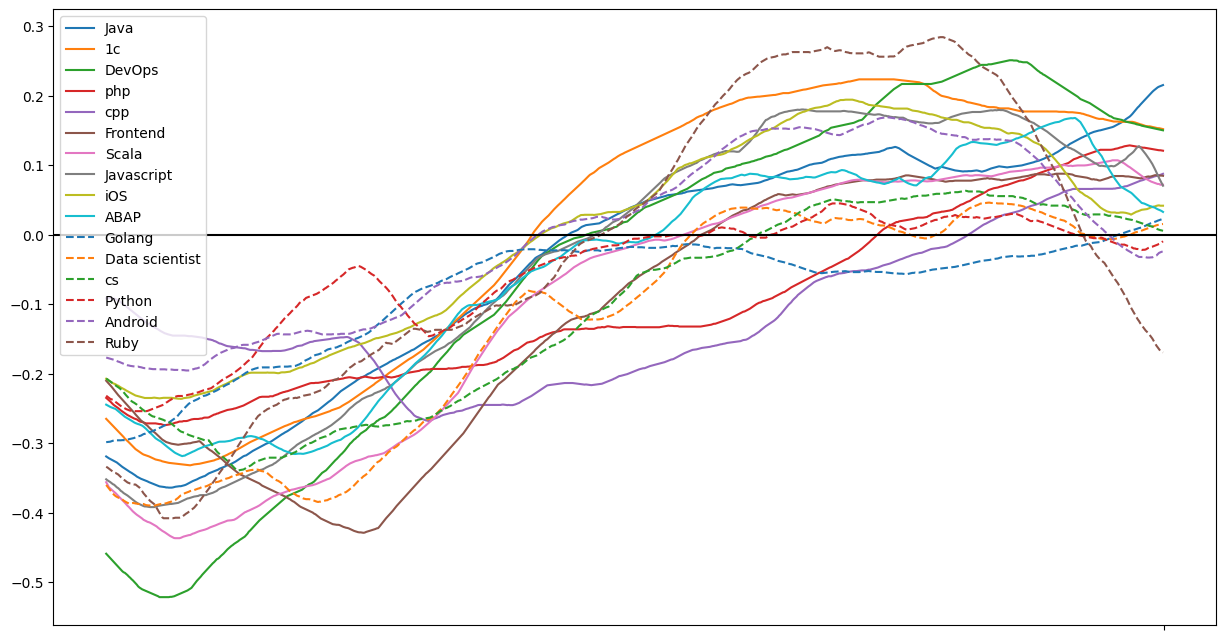

In [9]:
derivative('val_noexp', 300)

C:\Users\ksn\AppData\Local\Temp\ipykernel_7212\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


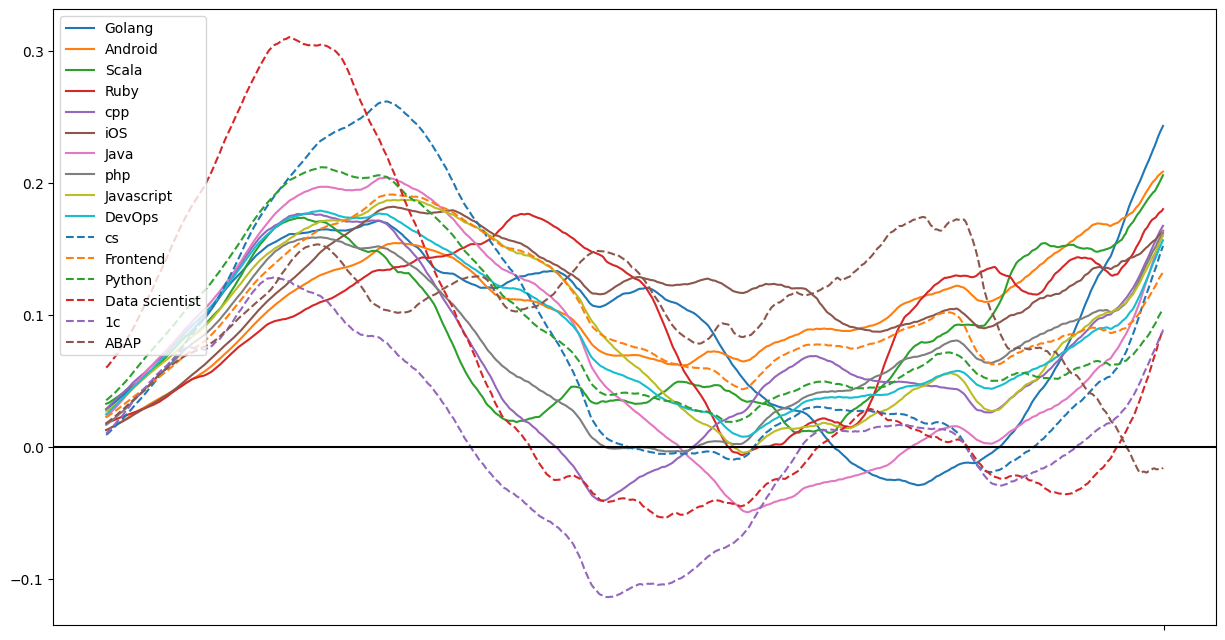

In [10]:
derivative('res_vac', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_7212\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


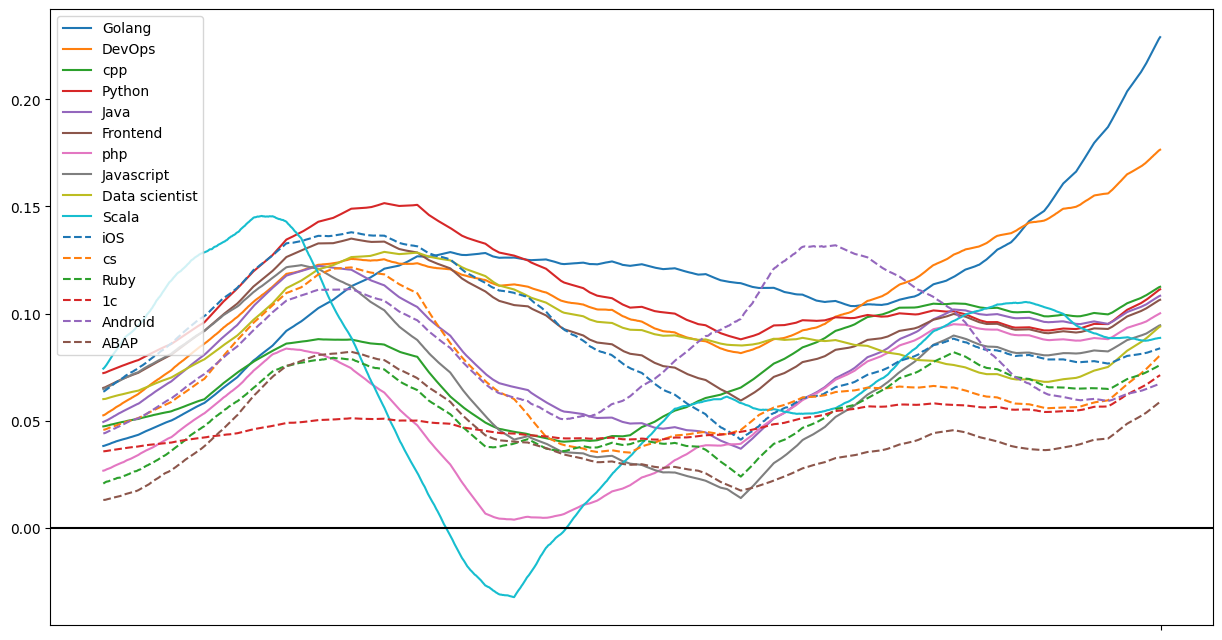

In [11]:
derivative('res', 200)

In [12]:
import seaborn as sns

def corr_matrix(colmns):
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.0)
    sns.heatmap(pd.DataFrame(langs[colmns]).corr(),cmap='GnBu',annot=True)

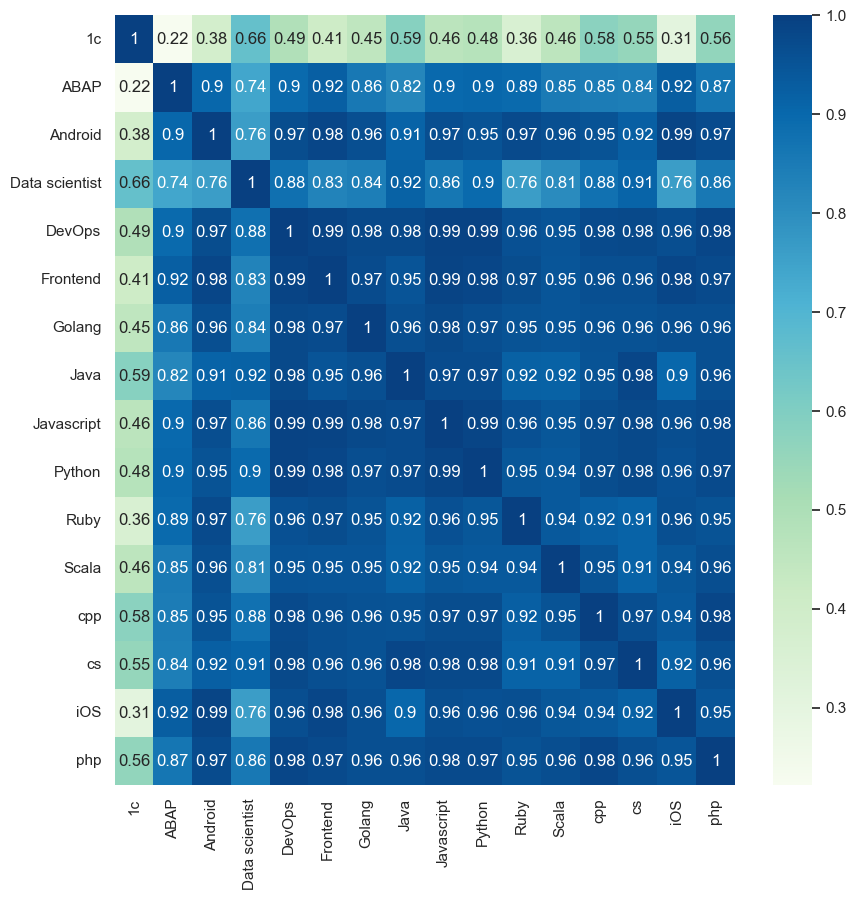

In [13]:
corr_matrix('res_vac')

In [14]:
langs.index = pd.to_datetime(langs.index)

def year(x):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 4)
    plt.plot(langs[x].groupby(langs.index.strftime('%m-%d')).median().median(axis=1))
    plt.xticks([str(i).zfill(2) + "-01" for i in range(1, 13)])
    plt.grid()

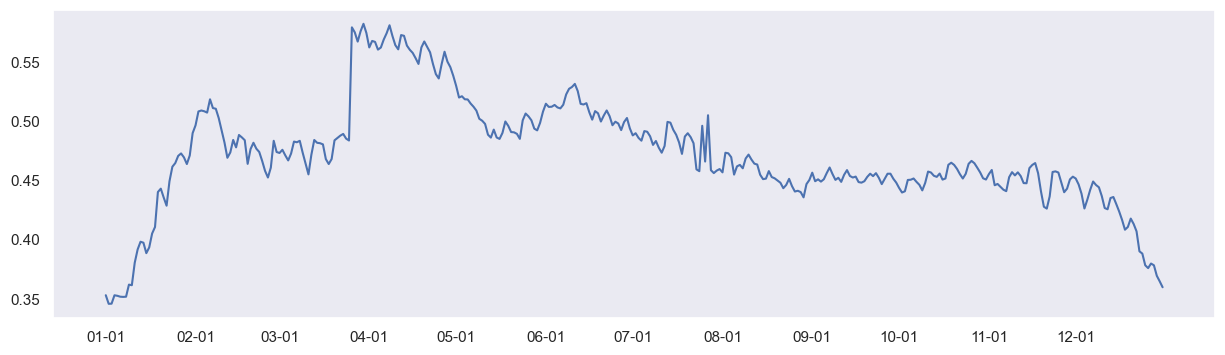

In [15]:
year("val")

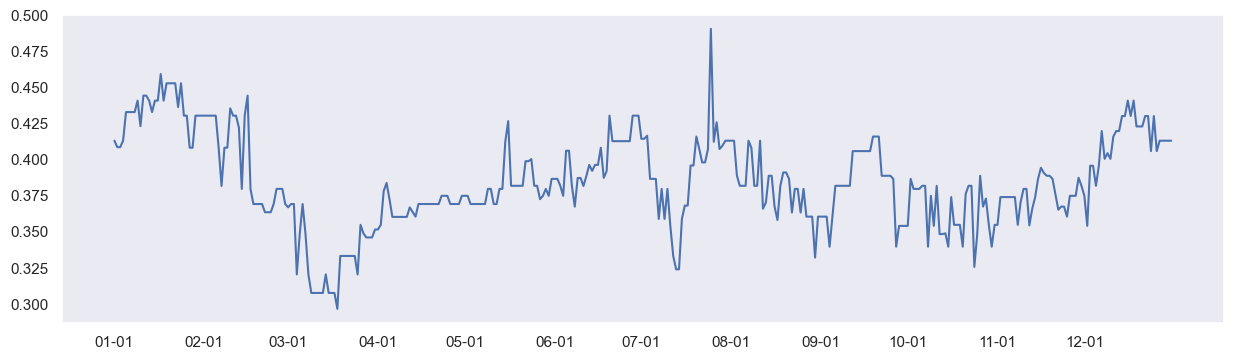

In [16]:
year("val_noexp")

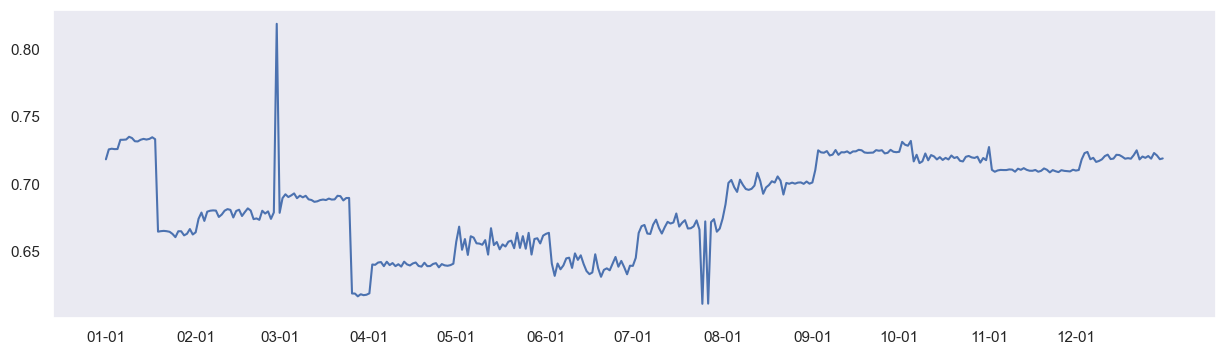

In [17]:
year("res")

In [18]:
def normalize(column, window):
    langs1 = langs[column].copy()
    colmns = langs1.iloc[0].sort_values(ascending=False).index

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels = []

    for i, c in enumerate(colmns):
        langs1[c] = langs1[c].rolling(window=window).mean()

        if i < 10:
            ax.plot(langs1[c])
            labels.append(langs1[c].name)
        else:
            ax.plot(langs1[c], linestyle='--')
            labels.append(langs1[c].name)

    ax.legend(labels)

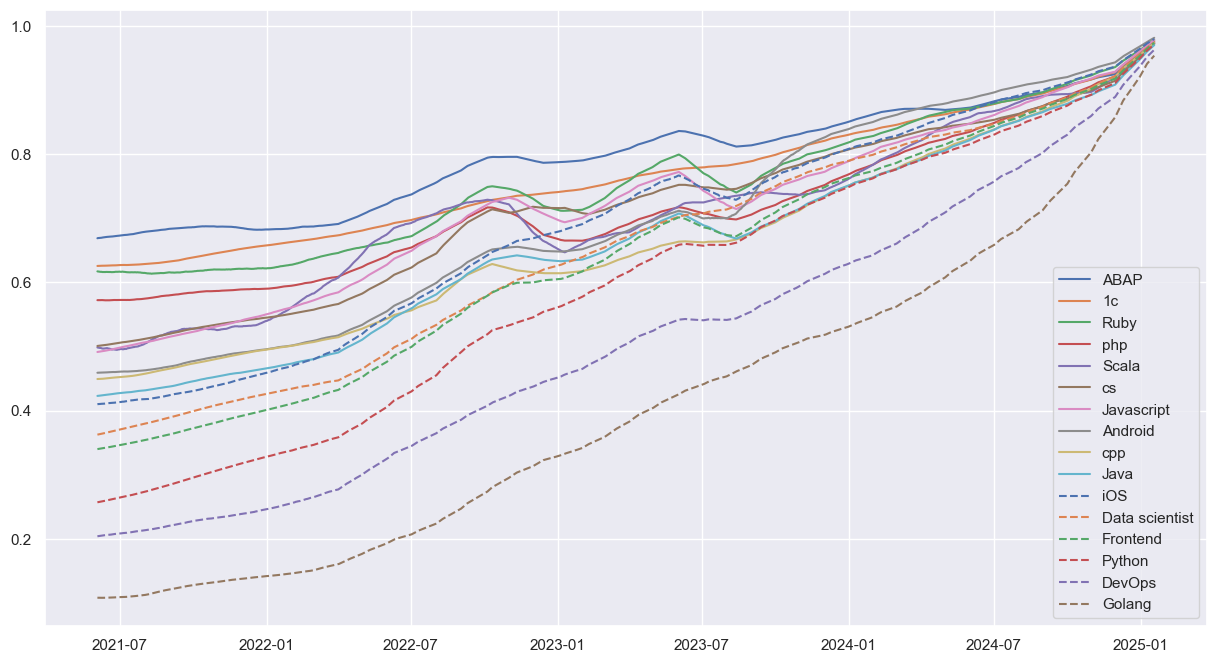

In [19]:
normalize("res", 70)

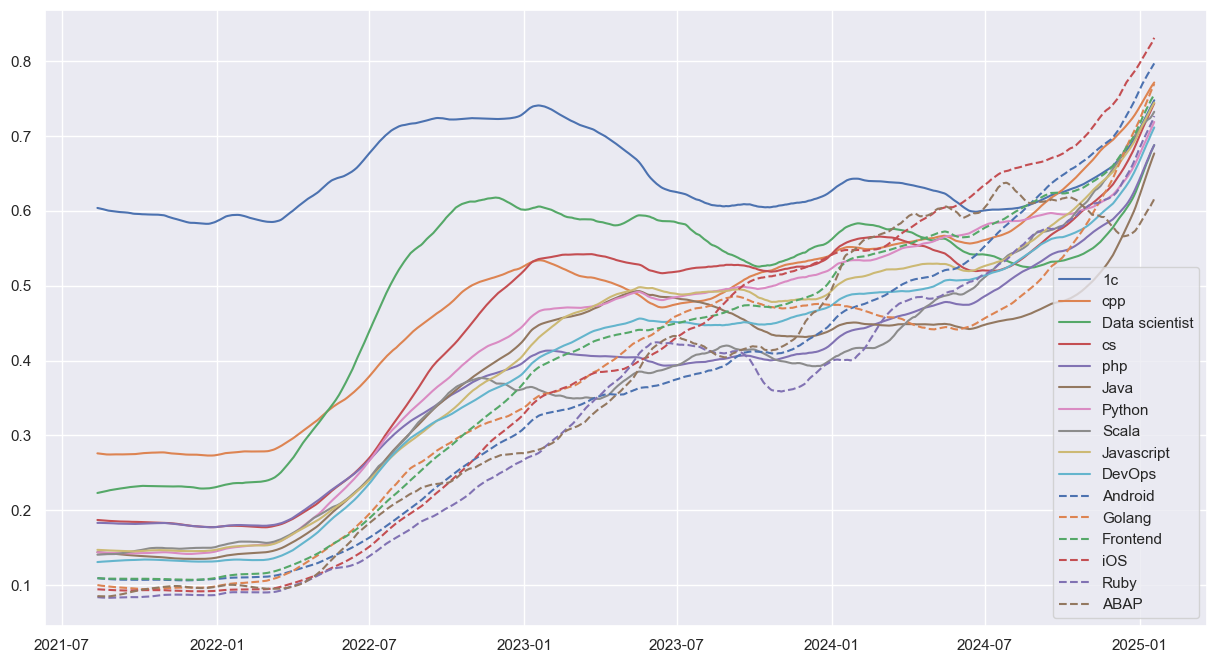

In [20]:
normalize("res_vac", 140)

In [42]:
langs.res.loc['2021-03']

,1c,ABAP,Android,Data scientist,DevOps,Frontend,Golang,Java,Javascript,Python,Ruby,Scala,cpp,cs,iOS,php
date_added,,,,,,,,,,,,,,,,
2021-03-26,0.624134,0.656250,0.453333,0.355230,0.201544,0.333150,0.109646,0.421064,0.482999,0.249200,0.623839,0.510370,0.449272,0.496958,0.400524,0.573106
2021-03-27,0.623512,0.669643,0.458032,0.354924,0.198828,0.334924,0.107526,0.416238,0.487665,0.248424,0.623839,0.503951,0.448526,0.494888,0.409079,0.569703
2021-03-28,0.621964,0.666802,0.459427,0.355974,0.194102,0.334053,0.106012,0.418139,0.489412,0.249672,0.631579,0.497531,0.445209,0.497101,0.403317,0.571877
2021-03-29,0.625066,0.666234,0.456928,0.354725,0.201852,0.331995,0.109359,0.415482,0.482074,0.250254,0.619195,0.500741,0.446897,0.496926,0.405522,0.568611
2021-03-30,0.624554,0.669643,0.461337,0.354978,0.195007,0.333793,0.105597,0.419489,0.483362,0.249776,0.617841,0.516790,0.447850,0.495684,0.401157,0.569008
2021-03-31,0.626388,0.660227,0.454795,0.356034,0.198527,0.335447,0.105597,0.417565,0.482438,0.249200,0.621840,0.526420,0.447232,0.493507,0.411240,0.569873


In [56]:
res = pd.DataFrame(columns=langs.res.loc['2021-03'].columns)

In [57]:
for i in sorted(set(langs.res.index.strftime('%Y-%m'))):
    res.loc[i] = langs.res.loc[i].mean()

In [58]:
langs.res.loc['2021-03'].columns

Index(['1c', 'ABAP', 'Android', 'Data scientist', 'DevOps', 'Frontend',
       'Golang', 'Java', 'Javascript', 'Python', 'Ruby', 'Scala', 'cpp', 'cs',
       'iOS', 'php'],
      dtype='object')

In [59]:
res

,1c,ABAP,Android,Data scientist,DevOps,Frontend,Golang,Java,Javascript,Python,Ruby,Scala,cpp,cs,iOS,php
2021-03,0.624270,0.664800,0.457309,0.355311,0.198310,0.333894,0.107290,0.417996,0.484658,0.249421,0.623022,0.509300,0.447498,0.495844,0.405140,0.570363
2021-04,0.625002,0.667495,0.458640,0.358451,0.201233,0.337239,0.108212,0.421208,0.487263,0.253680,0.615609,0.501868,0.448470,0.497303,0.407356,0.573121
2021-05,0.626355,0.670447,0.459896,0.367226,0.207441,0.343534,0.109117,0.425567,0.496344,0.261495,0.617874,0.494616,0.450718,0.505006,0.413358,0.571822
2021-06,0.628134,0.675982,0.462416,0.376507,0.211467,0.351010,0.109264,0.430635,0.502264,0.269540,0.615605,0.497309,0.454695,0.508204,0.415271,0.573248
2021-07,0.629204,0.682803,0.464190,0.384540,0.215988,0.358782,0.117424,0.433783,0.512162,0.279403,0.612106,0.514058,0.461585,0.516529,0.421392,0.576666
2021-08,0.636180,0.685345,0.473965,0.396087,0.226948,0.368545,0.127052,0.442504,0.519712,0.291259,0.617637,0.535460,0.470762,0.524776,0.428248,0.583923
2021-09,0.643339,0.687143,0.482706,0.404986,0.231265,0.379134,0.130785,0.451742,0.528149,0.302973,0.618064,0.521366,0.478049,0.532313,0.435509,0.585354
2021-10,0.650443,0.687285,0.488169,0.415574,0.236132,0.388074,0.136679,0.457204,0.536768,0.314158,0.621935,0.527774,0.486130,0.538360,0.444905,0.589004
2021-11,0.655796,0.681066,0.494866,0.422558,0.242897,0.398191,0.140744,0.463182,0.547056,0.324499,0.621343,0.538107,0.493604,0.543015,0.456655,0.589960
2021-12,0.660721,0.683557,0.498041,0.431555,0.251942,0.406288,0.143902,0.470198,0.556453,0.334289,0.622297,0.545352,0.498484,0.548525,0.463506,0.590915
